<a href="https://colab.research.google.com/github/DzakyFawwaz/gejalaku-app/blob/main/gejalaku-ml/final/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library & Load Data

In [ ]:
#!pip install tensorflowjs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os
from keras.saving import save_model
import tensorflowjs as tfjs
from google.colab import files

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import dataset penyakit dan gejalanya
url1='https://drive.google.com/file/d/1rn3qjDsP_3SBsM_nJQoK272_sPH42uWt/view?usp=sharing'
url1='https://drive.google.com/uc?id=' + url1.split('/')[-2]
df_disease = pd.read_csv(url1)
df_disease.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Infeksi jamur,gatal,ruam kulit,erupsi kulit nodular,bercak kulit tidak merata warna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Infeksi jamur,ruam kulit,erupsi kulit nodular,bercak kulit tidak merata warna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Infeksi jamur,gatal,erupsi kulit nodular,bercak kulit tidak merata warna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Infeksi jamur,gatal,ruam kulit,bercak kulit tidak merata warna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Infeksi jamur,gatal,ruam kulit,erupsi kulit nodular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

pada tahap ini, akan dilakukan :
- fitur yang NaN (tidak ada gejala) diganti menjadi '' (string kosong)
- mengubah format data gejala yaitu dengan mengganti spasi menjadi _, seperti "ruam kulit" menjadi "ruam_kulit"
- seluruh gejala pada tiap baris data dijadikan satu pada satu fitur combined_symptoms berupa string
- split data combined_symptoms menjadi list, disimpan pada fitur symptoms_list
- melakukan one-hot-encoding pada symptoms_list
- label encode fitur target yaitu Disease
- split data train 70%, val 15%, dan test 15%

In [ ]:
# mengubah format data gejala

# inisialisasi fitur gejala
symptom_cols = [f'Symptom_{i}' for i in range(1, 18)]  # ['Symptom_1', ..., 'Symptom_17']
# mengganti NaN menjadi string kosong
df_disease[symptom_cols] = df_disease[symptom_cols].fillna('')
# mengubah spasi menjadi _
df_disease[symptom_cols] = df_disease[symptom_cols].applymap(lambda x: x.replace(' ', '_') if isinstance(x, str) else x)

df_disease.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Infeksi jamur,gatal,ruam_kulit,erupsi_kulit_nodular,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,
1,Infeksi jamur,ruam_kulit,erupsi_kulit_nodular,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,
2,Infeksi jamur,gatal,erupsi_kulit_nodular,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,
3,Infeksi jamur,gatal,ruam_kulit,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,
4,Infeksi jamur,gatal,ruam_kulit,erupsi_kulit_nodular,,,,,,,,,,,,,,


In [ ]:
# gabungkan semua symptom pada satu fitur
df_disease['combined_symptoms'] = df_disease[symptom_cols].astype(str).agg(' '.join, axis=1)
df_disease.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,combined_symptoms
0,Infeksi jamur,gatal,ruam_kulit,erupsi_kulit_nodular,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,gatal ruam_kulit erupsi_kulit_nodular bercak_k...
1,Infeksi jamur,ruam_kulit,erupsi_kulit_nodular,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,,ruam_kulit erupsi_kulit_nodular bercak_kulit_t...
2,Infeksi jamur,gatal,erupsi_kulit_nodular,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,,gatal erupsi_kulit_nodular bercak_kulit_tidak_...
3,Infeksi jamur,gatal,ruam_kulit,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,,gatal ruam_kulit bercak_kulit_tidak_merata_war...
4,Infeksi jamur,gatal,ruam_kulit,erupsi_kulit_nodular,,,,,,,,,,,,,,,gatal ruam_kulit erupsi_kulit_nodular ...


In [ ]:
# 1. Split string gejala jadi list
df_disease['symptoms_list'] = df_disease['combined_symptoms'].str.split()

# 2. Inisiasi MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# 3. Fit dan transform
one_hot_encoded = mlb.fit_transform(df_disease['symptoms_list'])

# 4. Buat dataframe one-hot dengan kolom nama gejala
df_one_hot = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)

# Gabungkan dengan kolom Disease
df_final = pd.concat([df_disease['Disease'], df_one_hot], axis=1)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Columns: 132 entries, Disease to wajah_dan_mata_bengkak
dtypes: int64(131), object(1)
memory usage: 313.6+ KB


In [ ]:
df_final.head()

,Disease,asam_lambung,batuk,bau_tidak_sedap_pada_urin,bercak_di_tenggorokan,bercak_kulit_tidak_merata_warna,bercak_saat_buang_air_kecil,berkeringat,bersin_terus-menerus,bibir_kering_dan_kesemutan,...,serbuk_seperti_perak_di_kulit,sering_buang_air_kecil,sesak_napas,sulit_berkonsentrasi,tangan_dan_kaki_dingin,tekanan_sinus,tinja_berdarah,urin_berwarna_gelap,urin_kuning,wajah_dan_mata_bengkak
0,Infeksi jamur,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Infeksi jamur,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Infeksi jamur,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Infeksi jamur,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Infeksi jamur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# inisialisasi X dan y
X = df_final.drop(columns=['Disease'])  # fitur one-hot gejala
y = df_final['Disease']

# Split data: 70% train, 30% temp (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split temp data into 15% val, 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Label encode
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

num_classes = len(le.classes_)

In [ ]:
# ambil label target
label_to_int = {label: i for i, label in enumerate(le.classes_)}
print(label_to_int)

{'AIDS': 0, 'Alergi': 1, 'Arthritis': 2, 'Asma bronkial': 3, 'Cacar air': 4, 'Demam berdarah (Dengue)': 5, 'Diabetes': 6, 'Flu biasa': 7, 'GERD (refluks asam lambung)': 8, 'Gastroenteritis': 9, 'Hepatitis A': 10, 'Hepatitis B': 11, 'Hepatitis C': 12, 'Hepatitis D': 13, 'Hepatitis E': 14, 'Hepatitis alkoholik': 15, 'Hipertensi': 16, 'Hipertiroidisme': 17, 'Hipoglikemia': 18, 'Hipotiroidisme': 19, 'Impetigo': 20, 'Infeksi jamur': 21, 'Infeksi saluran kemih': 22, 'Jerawat': 23, 'Kelumpuhan (perdarahan otak)': 24, 'Kolestasis kronis': 25, 'Malaria': 26, 'Migrain': 27, 'Osteoartritis': 28, 'Penyakit kuning': 29, 'Pneumonia': 30, 'Psoriasis': 31, 'Reaksi obat': 32, 'Serangan jantung': 33, 'Spondilosis servikal': 34, 'Tifus': 35, 'Tuberkulosis': 36, 'Tukak lambung': 37, 'Varises': 38, 'Vertigo posisi paroksismal': 39, 'Wasir tipe dimorfik': 40}


In [ ]:
# cek kolom di X_train
list(X_train.columns)

['asam_lambung',
 'batuk',
 'bau_tidak_sedap_pada_urin',
 'bercak_di_tenggorokan',
 'bercak_kulit_tidak_merata_warna',
 'bercak_saat_buang_air_kecil',
 'berkeringat',
 'bersin_terus-menerus',
 'bibir_kering_dan_kesemutan',
 'bicara_pelo',
 'bintik_merah_di_tubuh',
 'buang_angin',
 'cekungan_kecil_di_kuku',
 'dahak',
 'dahak_berlendir',
 'dahak_berwarna_karat',
 'darah_di_dahak',
 'dehidrasi',
 'demam_ringan',
 'demam_tinggi',
 'depresi',
 'detak_jantung_cepat',
 'diare',
 'erupsi_kulit_nodular',
 'gagal_hati_akut',
 'gangguan_kesadaran',
 'gangguan_pencernaan',
 'gangguan_penglihatan',
 'gatal',
 'gatal_dari_dalam_tubuh',
 'gelisah',
 'gerakan_berputar',
 'gula_darah_tidak_teratur',
 'hidung_meler',
 'hidung_tersumbat',
 'iritasi_di_anus',
 'iritasi_tenggorokan',
 'jantung_berdebar',
 'jerawat_berisi_nanah',
 'kaki_bengkak',
 'kecemasan',
 'kedinginan',
 'kehilangan_keseimbangan',
 'kehilangan_nafsu_makan',
 'kehilangan_penciuman',
 'kekakuan_gerak',
 'kelebihan_cairan_tubuh',
 'kelela

## Modeling

In [ ]:
# Model
model = Sequential()
model.add(Dense(128, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 41)             │         5,289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,185 (86.66 KB)

 Trainable params: 22,185 (86.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(
    X_train, y_train_enc,
    epochs=90,
    validation_data=(X_val, y_val_enc)
)

Epoch 1/90
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - accuracy: 0.0321 - loss: 3.6751 - val_accuracy: 0.1304 - val_loss: 3.5578
Epoch 2/90
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2329 - loss: 3.4908 - val_accuracy: 0.3261 - val_loss: 3.3868
Epoch 3/90
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4359 - loss: 3.3118 - val_accuracy: 0.5435 - val_loss: 3.2182
Epoch 4/90
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6464 - loss: 3.1431 - val_accuracy: 0.6739 - val_loss: 3.0423
Epoch 5/90
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7335 - loss: 2.9519 - val_accuracy: 0.7391 - val_loss: 2.8520
Epoch 6/90
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7985 - loss: 2.7796 - val_accuracy: 0.8261 - val_loss: 2.6478
Epoch 7/90
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9002 - loss: 2.5209 - val_accuracy: 0.8913 - val_loss: 2.4312
Epoch 8/90
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9137 - loss: 2.3389 - val_accuracy: 0.9348 - val_loss: 2.2072

## Model Evaluation

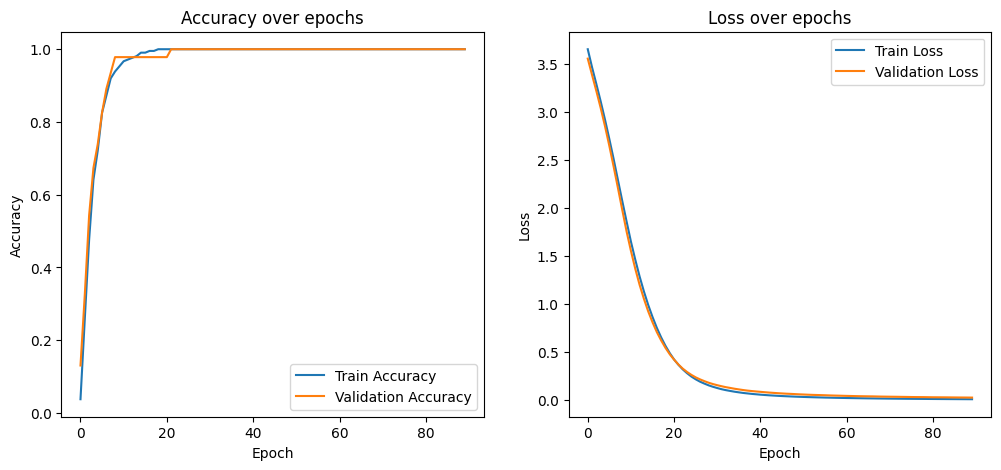

Test Accuracy: 1.0000
Test Loss: 0.0215


In [ ]:
# Plot Akurasi dan Loss selama training
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluasi akurasi di data test
loss, accuracy = model.evaluate(X_test, y_test_enc, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Loss: {loss:.4f}')

## Model Conversion

In [ ]:
model.save('model.h5')

In [ ]:
!tensorflowjs_converter --input_format keras model.h5 model_js/

2025-06-02 06:36:00.387209: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748846160.418572    2920 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748846160.428284    2920 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
!zip -r model_js.zip model_js
files.download("model_js.zip")

  adding: model_js/ (stored 0%)
  adding: model_js/group1-shard1of1.bin (deflated 8%)
  adding: model_js/model.json (deflated 72%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# menyimpan model dalam format TensorFlow.js
os.makedirs('tfjs_model', exist_ok=True)
tfjs.converters.save_keras_model(model, 'tfjs_model')

failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
# download Folder tfjs_model
!zip -r tfjs_model.zip tfjs_model
files.download('tfjs_model.zip')

  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/group1-shard1of1.bin (deflated 8%)
  adding: tfjs_model/model.json (deflated 72%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Inference

misal input gejala batuk, dahak berwarna karat (berdarah), demam tinggi, menggigil, sesak napas, kelelahan, dan nyeri dada yang merupakan beberapa gejala **Pneumonia** yang diambil dari [alodokter](https://www.alodokter.com/pneumonia/gejala#:~:text=Berbagai%20Gejala%20Pneumonia,Sakit%20kepala)

In [ ]:
# Input one-hot (semua kolom X_train harus ada)
input_dict = {col: 0 for col in X_train.columns}
input_dict['batuk'] = 1
input_dict['dahak_berwarna_karat'] = 1
input_dict['demam_tinggi'] = 1
input_dict['menggigil'] = 1
input_dict['sesak_napas'] = 1
input_dict['kelelahan'] = 1
input_dict['nyeri_dada'] = 1

input_df = pd.DataFrame([input_dict])[X_train.columns]

# Prediksi
proba = model.predict(input_df)
pred_index = np.argmax(proba, axis=1)[0]
predicted_disease = le.inverse_transform([pred_index])[0]

print("Prediksi penyakit:", predicted_disease)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
Prediksi penyakit: Pneumonia
